# British Airways Reviews Analysis

### Import Initial Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_columns = 100
pd.set_option('display.max_colwidth', None)


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.24.3
pandas version :  2.0.3
seaborn version :  0.12.2


### Load Dataset

In [2]:
df = pd.read_csv('BA_reviews.csv')

In [1]:
df.head(1)

NameError: name 'df' is not defined

## Pre-Processing

In [4]:
#Drop inmdex column
df.drop(columns='Unnamed: 0', inplace=True)

In [7]:
#Make new column of whether the trip is verified or not in the application
df['verification'] = df['reviews'].str.contains('✅')

#Label encoding for verification
df['verification'] = np.where(df['verification'] == True, 'Trip_Verified', 'Trip_not_Verified')

# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df['verification'] = le.fit_transform(df['verification'])

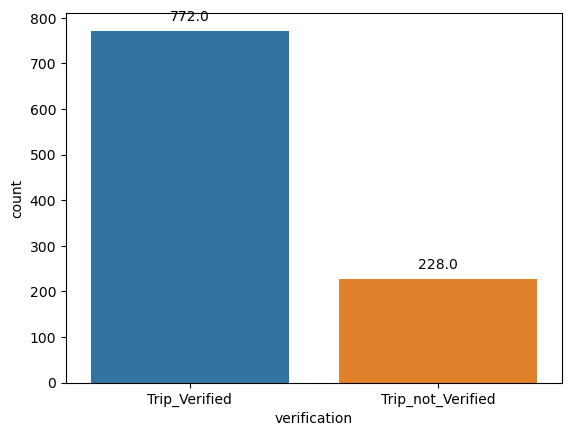

In [8]:
# Countplot by verification
ax = sns.countplot(data=df, x='verification')

# Add count annotations on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()

In [9]:
df.head(1)

,reviews,verification
0,"✅ Trip Verified | I have come to boarding and my cabin luggage was taken, ""because the plane is full"". I asked to take it to the cabin, because I have large notebook and electronics in it, but nothing changes. So, now I am sitting in the plane, holding notebook and several packs from my luggage, and think of how I will stand with all this stuff in my hands in a passport control line in Warsaw. Other people around me have come to the plane with cabin luggage!",Trip_Verified


In [10]:
# Replace the '✅ Trip Verified | ' prefix in reviews column
df['reviews'] = df['reviews'].str.replace('✅ Trip Verified | ', '', regex=False)
df['reviews'] = df['reviews'].str.replace('Not Verified | ', '', regex=False)

### Import and install nltk library and packages

In [11]:
# pip install textblob

In [12]:
# import nltk
# nltk.download('all')

### Sentiment Analysis

In [13]:
from textblob import TextBlob

df['polarity'] = df['reviews'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

In [14]:
df['polarity'].describe()

count    1000.000000
mean        0.066959
std         0.199649
min        -0.766667
25%        -0.048703
50%         0.052476
75%         0.182589
max         0.715000
Name: polarity, dtype: float64

<Axes: xlabel='polarity'>

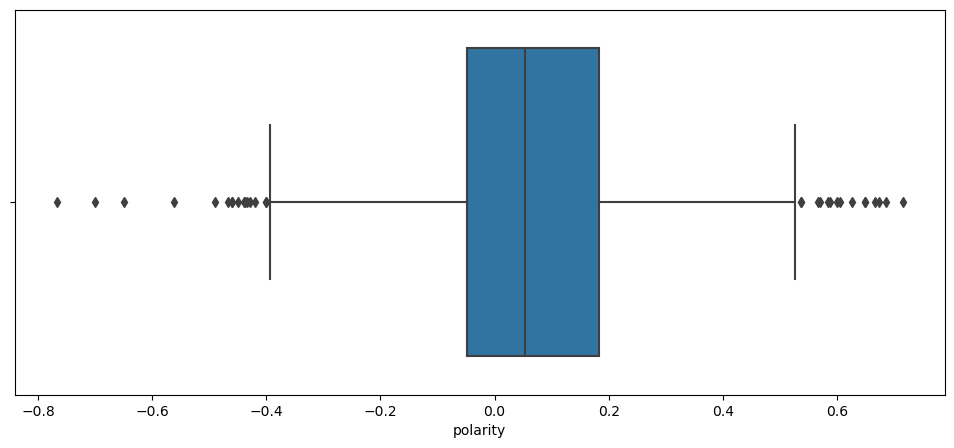

In [15]:
plt.figure(figsize=(12,5))
sns.boxplot(data = df, x=df['polarity'])

Text(0, 0.5, 'Frequency')

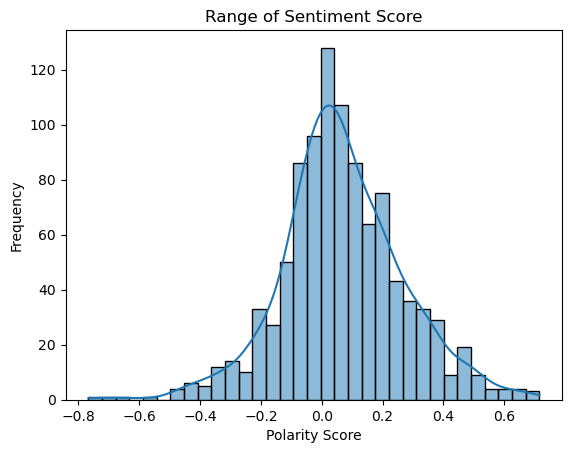

In [16]:
# Distribution of sentiment score in all reviews
sns.histplot(data=df, x='polarity', kde=True)
plt.title('Range of Sentiment Score')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')

In [17]:
#Check top 10 reviews with the highest polarity to the verify result

df[['reviews', 'polarity']].sort_values(by='polarity', ascending=False).head()

,reviews,polarity
744,Gatwick to St Lucia. Great service on this flight. Thank you very much for the cabin and the great cabin crew. Excellent Service.,0.715000
646,Hong Kong to London. Great airline indeed! Staff were friendly and helpful! The aircraft was very clean. The crews are diverse. Will definitely fly again.,0.686354
822,Edinburgh to Kuala Lumpur via London. I have just returned to KL from an extended visit in UK seeing family and friends. My return flight was BA033 from Heathrow to Kuala Lumpur on Monday 26th August 2019 at 21.10. I was greeted by the most delightful air hostess whose name I didn't quite catch. The point I wish to make is that she looked after me so well on the flight. She was exceptional. It really made the journey one of the best on board experiences I have had.,0.673333
721,Stockholm to London Heathrow. As always BA works excellent with service. On the ground and in the air. They still have a good gin aboard for a decent G&T and even if the meals in Business looks like the came from the 90's economy they taste great.,0.666667
376,"For this 5 hour 15 min flight, you are given a bag of potato chips, and a bottle of water. If you want to purchase more food and drink you do this via their app on your phone. Or like me you can pre-order weeks before you fly. However there is no guarantee you will get your order, mine never came, so after enquiring where the order was, they told me they had food for someone who was not on the plane, that someone was me it turned out. They also managed to lose my luggage. I am still waiting for them to contact me regarding it. I will never use them again.",0.650000


In [18]:
#Check bottom 10 reviews with the lowest polarity to the verify result

df[['reviews', 'polarity']].sort_values(by='polarity', ascending=True).head()

,reviews,polarity
861,"Mykonos to London flight delayed and waiting to depart. They are not on time, be prepared to miss your connections, take off 2 hours late,. The staff is some of the worst I have had on airlines. You may be stuck on the runway and they won’t offer you any water. The worst business class experience I have had.",-0.766667
97,"The worst service ever, my baggage did not arrive on time. Both my flights were delayed. I will never fly them again. Even the food was bad and your service.",-0.700000
869,"Stockholm to London. Worst business class flight I have flown. Split seating for myself and my wife because apparently they were overbooked. The meal was inedible for me, and was the worst airline meal I have been served.",-0.650000
470,The food was awful. An over night early morning flight started with the offer of a terrible chicken wrap thing. Terrible. Then went to a Traditional Breakfast with disgusting sausage and inedible hash brown's. Such rubbish on BA.,-0.562500
163,"Absolutely horrible airline. Communication is terrible. Last minute delays, cancellations, seat changes with no communication. App and website user experience is years behind other airlines. Seats are cramped and uncomfortable. Overpriced. Would not fly again.",-0.489286


In [19]:
#Make category for the reviews polarity scores ()

df['review_category'] = df['polarity'].apply(lambda x: 'good' if x > 0.052 else 'bad' if x < -0.052 else 'neutral')

In [20]:
df.sample(10)

,reviews,verification,polarity,review_category
964,London to Bangalore. This was the worst experience. I flew with my infant daughter ande cabin crew was extremely rude. I was surprised that there was no way to heat milk for my daughter. I found the food portions so meagre. Not sufficient for a child also. British Airways is sad in every sense of the term.,Trip_Verified,-0.340000,bad
570,"Me and my 1 year 11 months baby girl flew business class from Moscow Domodedovo to London Heathrow on 11 august. When we landed at Heathrow, my baby was sleeping. I asked stewards for my stroller, and they said it is going to wait for me at the and of the corridor before entrance to terminal building. I grabbed my sleeping baby, who is nearly 15 kg, and luggage bag (another 15 kg) and walked away. I went and entered the building, and met no one with my pram or just my pram left somewhere in this corridor. And there was no one to ask. Just a flow of passengers behind me and in front of me. On top of that, we landed at terminal 5,and I had to travel on a train to arrivals terminal for passport control and other procedures still on my own, holding my baby and heavy bag on my shoulder. I met no one whom I can ask for a help. First British airways representative I met was after passport control , i explained the situation and he said that I have to go downstairs and my pram will be with my suitcases. No further assistance or help. I had to wait another hour for luggage and pram. I am absolutely frustrated, upset and disappointed! I can see that British Airways do not care about mothers with kids at all.",Trip_Verified,-0.070192,bad
248,This was literally one of the worst experiences. I haven’t been to an airport since. It began in Orlando flying back the flight plan system went down and we were stuck on the tarmac for 6 hours. Poor customer service and just ignored at times. Then missed my connecting flight and we were told not to leave the baggage area without our bags. Even though I booked through to Dublin. Another 4 hours I was told my bags were lost and to continue to the desk to book a flight. Another hour later I was handed a card with a number and told to ring it. I was cut off three times and told I wouldn’t be able to get home that day despite several flights being available. Just booked my own flight and had lost my suit and presents for Christmas and missed an engagement party.,Trip_not_Verified,-0.006173,neutral
328,"I booked the flight on Oct 8, but have to cancel the flight on the same day after learning that I can't get my entry visa in time for the flight. And I did receive a confirmation email says my flight was canceled. But in the cancellation email, the booking reference number is a different one. So I requested cancellation, but BA canceled another person's flight and sent the confirmation to my email? I assumed that my flight was canceled, but after more than 3 weeks, I still have not received any refund, so I reached out, and it turned out my flight is still on?! And it is getting even more ridiculous when you try to reach out to BA. I tried multiple different ways, phone calls, and emails, but none was able to investigate what actually happened nor has the authority help cancel my flight without paying penalty. Based on my experience, no ones reads your email carefully, no matter how much context you put in. Given all I have experienced, I have zero faith in British Airways.",Trip_Verified,0.180128,good
10,"Overall very satisfied. Ground staff member at YVR was extremely helpful & courteous. A350 was only a few months old, so seats were in good order & comfortable by the standards of a modern day Y class seat, although the very small washroom was already starting to look a bit shabby. Cabin crew very friendly & professional, & meal service carried out at reasonable time in the flight. Choice of 2 options for the main meal which was the same for both legs of my journey 1 month apart. Flight departed on time but unfortunatel

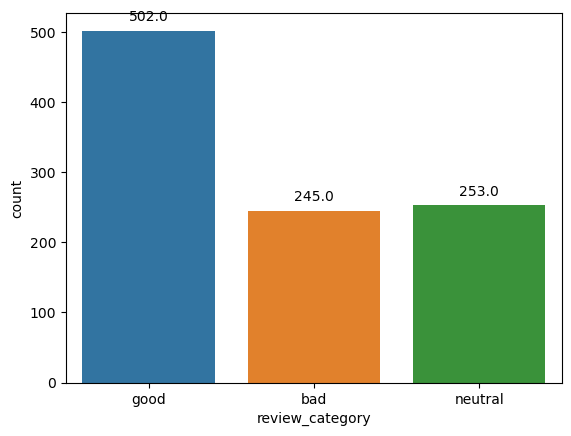

In [21]:
# Countplot by Review Category
ax = sns.countplot(data=df, x='review_category')

# Add count annotations on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()

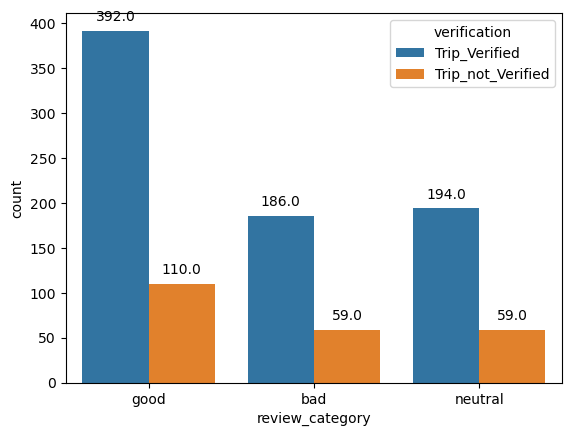

In [22]:
# Countplot of Review Category by trip verification
ax = sns.countplot(data=df, x='review_category', hue='verification')

# Add count annotations on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()

In [23]:
#Label encoding for review category
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['review_category'] = le.fit_transform(df['review_category'])

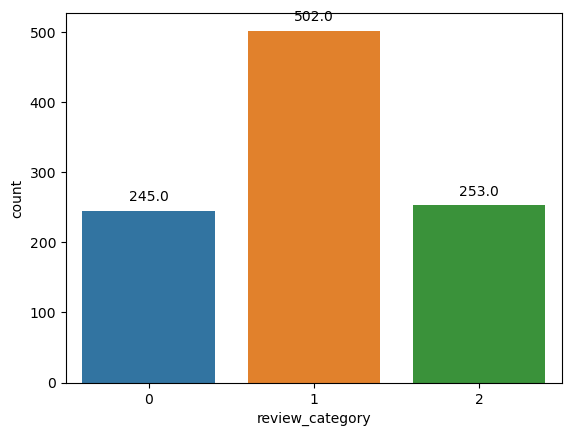

In [24]:
# Countplot for label-encoded Review Category
ax = sns.countplot(data=df, x='review_category')

# Add count annotations on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()

In [25]:
#Checking final dataframe
df.sample(10)

,reviews,verification,polarity,review_category
766,"My flight from London to Singapore in premium economy was the worst I have experienced. The seat was uncomfortable, the flight tracker failed after two hours, the breakfast prior to arrival in Singapore (scrambled egg) was like rubber. They ran out of cups and so my wife and I had no coffee, tea or drink with our breakfast. I used the call button to get some attention and no one came to answer my call even after waiting more than 30 minutes. Eventually I made contact with a passing cabin crew member and advised that we had not had a drink and was told that they would come back. I never saw the crew member again.",Trip_Verified,-0.100000,0
878,"Rotterdam to London City. After waiting for 6 hours at Rotterdam airport (delays) I was told they re-routed my flight to Amsterdam and that I needed to quickly catch a taxi (that I have to pay for) from Rotterdam to Amsterdam airport in the hope of catching the flight from there. As I worried I wouldn’t make it, I asked to be put in a hotel & fly the following morning but they said that was not an option as all fights are booked. There was no apology, no offer of a bus or taxis to those re-routed to Amsterdam. And throughout the process & long queue no one bothered to explain to us what was happening. Had I known we’d be re-routed to Amsterdam I would’ve left Rotterdam earlier, rather than wait in a long queue just to he told that info at the end. What a waste of time, energy & money. And no apology to make up for the hours or delay. It’s quite unbelievable.",Trip_Verified,0.118333,1
71,"✅ Trip Verified | BA has a real problem with boarding it's flights. Those who get on first fill the luggage bins with 2 bags, one of which is supposed to be small and under seat only. Cabin staff don't bother implementing their own rules. Subsequent passengers mill up and down the aisle, bumping into each other, searching for space. Boarding this flight took an hour as a result of this nonsense. The incoming flight was late already so our 90 minute flight was 90 minutes late.",Trip_Verified,-0.008056,2
279,Good lounge at Cape Town. On time departure. Drinks high quality. Sound dinner service. Breakfast reasonable. Arrival lounge was good but showers cold.,Trip_Verified,0.260000,1
726,"San Francisco to Oslo via London. The head support was damaged, so I had to sit 10 hours leaned forward. The flight from San Francisco was delayed, so I missed my connecting flight in London to Oslo. I came first to the BA counter, but received a new flight 3 hours 15 minutes later. Rude staff gave me a voucher for 15 GBP.",Trip_Verified,0.021591,2
297,"BA website did not work (weirdly deleted my flight from ""upcoming flights"" on the day of departure). Chaos at Cape Town airport with hundreds queuing as the computers were down. Chaos at the gate / no queue management for premium passengers. Very nice new A350 with smart new club suite. Champagne warm (cabin crew said its impossible to serve it cold, which is not true as Air France manage it). Disappointing meal, wine served so late after the food you have finished by the time it arrives. Cheese ice cold and tasteless (why can't the champagne / white wine be in the fridge used for the cheese?). Good IFE system but mediocre film selection. Disappointing breakfast. Overall: 3 / 10. Flew Air France business the month before which was way better. So sad what's become of BA.",Trip_Verified,-0.101373,0
567,"The entertainment system was working badly, the screen was freezing every time I wanted to open flight map. Though the aircraft was 8 years only, the window blinds worked with delays. The crew informed passengers that there would be no headphones provided as it was supposed to be a short-haul flight. After flying with Aeroflot and S7 Airlines, I expected to receive an excellent BA service, but I got only a pack of crisps and a tiny bottle of water. I think it’s unacceptable for a non-low-cost carrier to offer service like th